### 2. Statistical Tests and Metric

After deciding on a model, we perform statistical tests for the feasibility of the model.  The goal of this Part 2 is to survey these tests and statistical metrics they produce.  We start with AR model example.

#### Example

We consider time series of (log of) gasoline price and use R package to AR (AutoRegression) model this time series:  

In [6]:
library(repr)

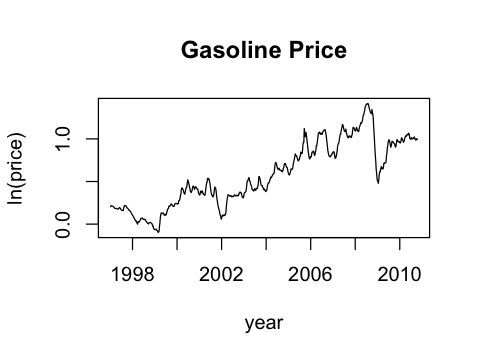

In [25]:
dat=read.table("w-gasoline.txt")
gas_price=log(dat[,1])

tdx=c(1:717)/52+1997  # calendar time

options(repr.plot.width=4, repr.plot.height=3)
plot(tdx,gas_price,xlab='year',ylab='ln(price)',type='l')
title(main='Gasoline Price')


First we investigate autoregression pattern of the price change. Let $g_t$ denote time series of gas price change.  That is, 

$$g_t =\text{gas price at time}\ t - \text{gas price at time}\ (t-1) $$

We intuitively describe price change as:

$$g_t =\text{mean level, drift} + \text{infulence of history} + \text{shock, news, natural volatility} $$

More compactly we write:
$$ g_t = \mu_t + a_t + \sigma_t $$  

For this example, we hypothesize that mean level $\mu_t =0$.  And we postpone investigation of volatility part $\sigma_t$ for later time and more complex model.  (For now, we treat $g_t = a_t$)

Now we choose AR model to study $a_t$.  That is, we assume $a_t$ depends on its previous values, its history, with appropriate weights.  In compact form we write: 

$$ a_t = \alpha_1 a_{t-1} + \alpha_2 a_{t-2} + \dots $$

First we consider autocorrelation functions.

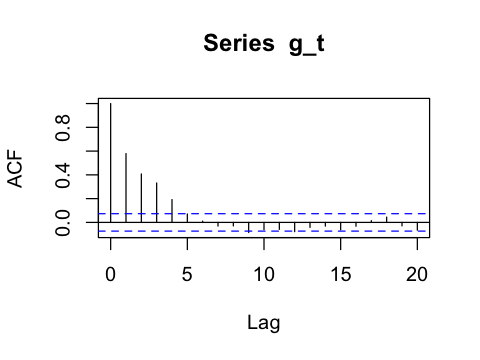

In [27]:
g_t = diff(gas_price)

#choose lag
acf(g_t, lag=20)
#pacf(g_t, lag=20)

The graph above indicates that any lags above 5 are insignificant. So we can write:

$$ a_t = \alpha_1 a_{t-1} + \alpha_2 a_{t-2} + \dots + \alpha_5 a_{t-5} $$

In fact, R package provide AR model estimation:

In [17]:
ar_model = ar(g_t, method='mle')
ar_model$order

[1] 5

Next we perform Student's t-test:

In [15]:
t.test(gas_price_change)


	One Sample t-test

data:  gas_price_change
t = 1.3062, df = 715, p-value = 0.1919
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0005536374  0.0027549956
sample estimates:
  mean of x 
0.001100679 


To understand the results, we survey common statistical tests and metrics.

#### p-value (p-score)

Wikipedia has such an excellent article, so we refer to it for detailed explanation of p-value.

Recall that we assumed mean drift $\mu_t=0$.  That is, our null hypothesis is $\mu_t =0$.
Since p-vaue above is not small enough, we cannot reject the null hypothesis.  Therefore, we accept
$\mu_t=0$.

#### Student's t-test

Student's t-test is performed when we need to infer parameters of a large population from measurements obtained from a smaller sized samples. In gas price example above, we found

$$ \text{t-ratio or t} = \frac{\bar{a} - \mu}{\frac{s}{\sqrt{n}}} $$

Here $n$ is the sample size. $\bar{a}$ and $s$ are sample mean and sample standard deviation, respectively. t=1.3062 is not big enough to reject null hypothesis $\mu_t =0$.

In this case, larger t-ratio simply means that a mean obtained from samples is different from the hypothesized mean, rejecting null hypothesis.  

To be continued: We need to consider more realistic models and expand statistical tests and metrics. 